# Sean McWhirter

# NLP Homework 6

In [1]:
import pandas as pd

# 1) A.
>a.	Do a book search on Amazon. Manually copy the full book title (including subtitle) of each of the top 24 books listed in the first two pages of search results. 

For the book search, I searched "mystery books." In amazon and coppied the top 25 books from the search results.

In [2]:
df = pd.read_excel(r'C:\Users\seans\Desktop\NLP\HW6\mystery_books.xlsx', header=None)

#convert to list to iterate through
book_list = df[0].tolist()

In [3]:
book_list
print("Number of Titles:",len(book_list))
print("Titles: ", book_list)

Number of Titles: 25
Titles:  ['ghost platoon', 'cold lake (david wolf book  5)', 'the preference: a holly jennings thriller', 'the housekeeper: a twisted psychological thriller', 'midwinter murder: fireside tales from the queen of mystery', 'the perfect wife (a jessie hunt psychological suspense thriller)', 'if she knw (a kate wise mystery)', 'never look back', 'a time for mercy (jake brigance book 3)', 'then she was gone: a novel', 'i am watching you', 'a to z mysteries series 26 books set the complete collection dink josh ruth rose', 'christmas cupkake murder: a festive & delicious christmas cozy mystery (a hannah swensen mystery book)', 'all the devils are here: a novel (chief inspector gamache novel book 16)', 'murder in the manor (a lacey doyle cozy mystery)', 'thin air (jessica shaw book 1)', 'the dancing girls: an absolutely gripping crime thriller with nail-biting suspense', "my sister's grave (tracy crosswhite book 1)", 'the girl who lived: a thrilling suspense novel', 'the a

# 1) B. 
>In Python, run one of the text-similarity measures covered in this course, e.g., cosine similarity. Compare each of the book titles, pairwise, to every other one. 

In [11]:
#https://stackoverflow.com/questions/12118720/python-tf-idf-cosine-to-find-document-similarity

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.corpus import stopwords
import numpy as np
import numpy.linalg as LA
from nltk.tokenize import word_tokenize
import string

In [12]:
#set stopwords as a variable
sw = stopwords.words('english')

In [21]:
#code adapted from: https://towardsdatascience.com/calculating-string-similarity-in-python-276e18a7d33a

#function to clean the titles up
def clean_titles(x):
    tmp = ''.join([i for i in x if i not in string.punctuation])
    tmp = tmp.lower()
    tmp = ' '.join(i for i in tmp.split() if i not in sw)
    return tmp

In [22]:
title_list_clean = list(map(clean_titles,book_list))

In [23]:
#Double check that our list is cleaned (all lower and no punctuation)
title_list_clean

['ghost platoon',
 'cold lake david wolf book 5',
 'preference holly jennings thriller',
 'housekeeper twisted psychological thriller',
 'midwinter murder fireside tales queen mystery',
 'perfect wife jessie hunt psychological suspense thriller',
 'knw kate wise mystery',
 'never look back',
 'time mercy jake brigance book 3',
 'gone novel',
 'watching',
 'z mysteries series 26 books set complete collection dink josh ruth rose',
 'christmas cupkake murder festive delicious christmas cozy mystery hannah swensen mystery book',
 'devils novel chief inspector gamache novel book 16',
 'murder manor lacey doyle cozy mystery',
 'thin air jessica shaw book 1',
 'dancing girls absolutely gripping crime thriller nailbiting suspense',
 'sisters grave tracy crosswhite book 1',
 'girl lived thrilling suspense novel',
 'atlantis gene thriller origin mystery',
 'taken grave completely unputdownable mystery thriller detective jo fournier novel book',
 'murder irish christmas irish village mystery book

In [33]:
#import cosine simliarity
from sklearn.metrics.pairwise import cosine_similarity

In [34]:
#Create our matrix of word appearances
vec = CountVectorizer().fit_transform(title_list_clean)
vecs = vec.toarray()

In [35]:
#Shape of our vector matrix
vecs.shape

(25, 100)

In [36]:
#Cosine similarity of the titles
cos_similarity = cosine_similarity(vecs)

#Examine the first two titles of the matrix
cos_similarity[:2,:]

array([[1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.2       , 0.        ,
        0.        , 0.        , 0.1118034 , 0.14142136, 0.        ,
        0.2       , 0.        , 0.2       , 0.        , 0.        ,
        0.13483997, 0.1490712 , 0.        , 0.        , 0.        ]])

In [38]:
#Create function to compare pairwise:
cos_similarity.shape

(25, 25)

# 1) C.
>Which two titles are the most similar to each other? Which are the most dissimilar? Where do they rank, among the first 24 results?

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

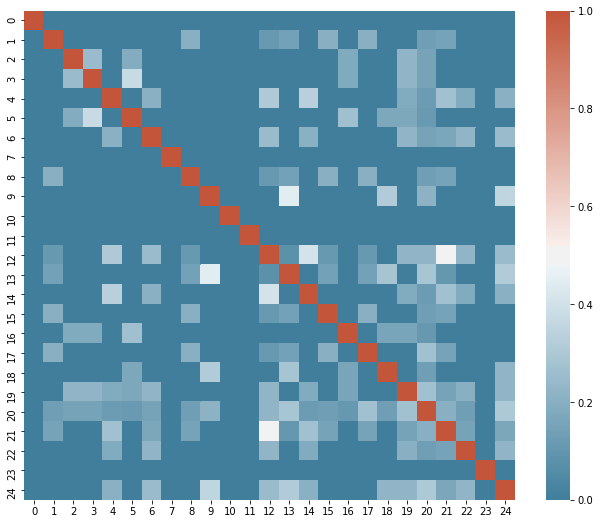

In [53]:
#code adapted from: https://seaborn.pydata.org/examples/many_pairwise_correlations.html

f, ax = plt.subplots(figsize=(11,9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(cos_similarity, cmap=cmap)

Judging by our heatmap, we can easily tell that (21, 12), or (12,21) since it's a symmetric matrix, have the highest value.  Let's inspect these titles.

In [125]:
print("Score: ", cos_similarity[12,21])
print("\nTitle 12:\n", book_list[12],"\n","Title 21: \n",book_list[21])

Score:  0.49999999999999994

Title 12:
 christmas cupkake murder: a festive & delicious christmas cozy mystery (a hannah swensen mystery book) 
 Title 21: 
 murder at an irish christmas (an irish village mystery book)


This seems to make sense due to the overlap of murder, christmas, mystery, and book. These title values are the rank they appeared in, so eleven books apart, which is quite far.

In [48]:
#https://stackoverflow.com/questions/30180241/numpy-get-the-column-and-row-index-of-the-minimum-value-of-a-2d-array

#Find the minimum value
print(np.unravel_index(cos_similarity.argmin(), cos_similarity.shape))

(0, 1)


Judging by the heatmap, there are multiple zero values, but (0,1) shows to be the initial zero value.

In [57]:
print("Title 0:\n", book_list[0],"\n","Title 1: \n",book_list[1])

Title 0:
 ghost platoon 
 Title 1: 
 cold lake (david wolf book  5)


This also makes sense due to the zero overlap of words.  These wre the first two titles of the book search.

# 2) A.
>a.	Enter one of the book titles from question 1a into Google, Bing, or Yahoo!. Copy the capsule of the first organic result and the 20th organic result. Take web results only (i.e., not video results), and skip sponsored results. 

In [116]:
#Title used for search (Google)
Title = "the preference: a holly jennings thriller"

#1st organic reslt
first = """ Amazon.com: The Preference: A Holly Jennings Thriller (9781701567887): Alexander, A.K.: Books."""
#20th organic result
twentieth = """Flight 12: A PSI Thriller (Unabridged). 2015 
See No Evil (Unabridged). 2016 
The Preference: A Holly Jennings Thriller (Unabridged). 2015 · Hear No Evil: The"""

# 2) B.
>b.	Run the same text similarity calculation that you used for question 1b on each of these capsules in comparison to the original query (book title). 

In [117]:
capsules = [Title, first, twentieth]

#code adapted from: https://towardsdatascience.com/calculating-string-similarity-in-python-276e18a7d33a

#function to clean the capsules up
def clean_string(x):
    tmp = ''.join([i for i in x if i not in string.punctuation])
    tmp = tmp.lower()
    tmp = ' '.join(i for i in tmp.split() if i not in sw)
    return tmp

capsules_clean = list(map(clean_string,capsules))

In [118]:
capsules_clean

['preference holly jennings thriller',
 'amazoncom preference holly jennings thriller 9781701567887 alexander ak books',
 'flight 12 psi thriller unabridged 2015 see evil unabridged 2016 preference holly jennings thriller unabridged 2015 · hear evil']

In [119]:
#Create our matrix of word appearances
c_vec = CountVectorizer().fit_transform(capsules_clean)
cap_vecs = c_vec.toarray()

In [121]:
#Code adapted from: https://towardsdatascience.com/calculating-string-similarity-in-python-276e18a7d33a

#Funciton to compare the two results to the title
def capsule_cossim_vecs(x, y):
    x = x.reshape(1,-1)
    y = y.reshape(1,-1)
    return cosine_similarity(x,y)[0][0]

# 2) C.
>c.	Which one has the highest similarity measure? 

In [122]:
#Title versus 1st capsule
capsule_cossim_vecs(cap_vecs[0],cap_vecs[1])

0.6666666666666666

In [123]:
#Title versus 20th capsule
capsule_cossim_vecs(cap_vecs[0],cap_vecs[2])

0.4564354645876384

As I expected, the 1st organic search result capsule provided a much higher cosine similarity score than the 20th.  However, the 20th capsule provided a much higher score than I had anticipated.  

# 3)
>Submit all of your inputs and outputs and your code for this assignment, along with a brief written explanation of your findings. 

Overall, my findings were not too surprising.   For problem #1, the highest cosine similarity score between two titles was 0.50 (rounding). I am not surprised that I didn't see any scores over the 0.5-range, as many titles are just very wordy.  However, I did expect to see more higher scores given the genre-based search of 'mystery books' on Amazon.  Unsurprisingly, the lowest score was 0, and there were many of those.  I presupposed that most mystery books would share similar titles, but I guess they aren't too similar after all. 

The Google search results did not surprise me at all for problem #2.  The first organic search result had a cosine similarity score of 0.67, and the 20th had a score of 0.46. I would assume that you would want to provide search results with a great deal of the same words as the search term.  I did think that the score for the 20th result would be lower. 